In [1]:
# Author: Tree
# If you want to refer this example, please note the Author
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.multiclass import OneVsRestClassifier
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import warnings
warnings.filterwarnings('ignore')

# iris = datasets.load_iris()
# X = iris.data[:, :2]
# y = iris.target

# Controlled dataset
X, y = datasets.make_blobs(n_samples=100,\
                           n_features=2,\
                           centers=2,\
                           cluster_std=2,\
                           center_box=(-18, 18),\
                           random_state=1234)


def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 10, x.max() + 10
    y_min, y_max = y.min() - 10, y.max() + 10
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy




def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out



<IPython.core.display.Javascript object>


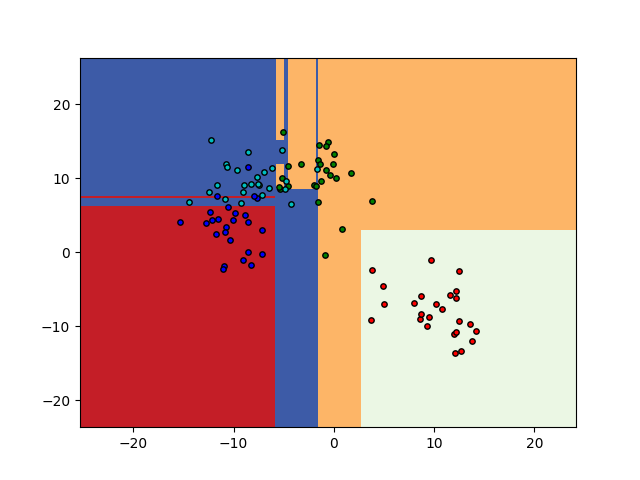

interactive(children=(Dropdown(description='centers', index=1, options=(1, 2, 3, 4, 5, 6, 7, 8), value=2), Dro…

<function __main__.update(centers=2, cluster_std=2)>

In [15]:
%matplotlib notebook
# Model
# svm_model = svm.SVC(kernel='poly', degree=3, C=1)
# svm_model.fit(X, y)

dt = DecisionTreeClassifier()
# dt = OneVsRestClassifier(dt)
dt.fit(X, y)

# Meshgrid
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)
Z = dt.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Figure
fig, ax = plt.subplots(1, 1)
contours = ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
points = ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')



def update(centers=2, cluster_std=2):
    
    X, y = datasets.make_blobs(n_samples=100,\
                               n_features=2,\
                               centers=centers,\
                               cluster_std=cluster_std,\
                               center_box=(-18, 18),\
                               random_state=1234)
    # Train
    dt = DecisionTreeClassifier().fit(X, y)

    x_min, x_max = X[:, 0].min() - 10, X[:, 0].max() + 10
    y_min, y_max = X[:, 1].min() - 10, X[:, 1].max() + 10
    plot_step = 0.02
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())

    Z = dt.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    contours.ax.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    print(np.unique(y))
    plot_colors = 'bgrcmykw'
    for i, color in zip(range(centers), plot_colors[:centers]):
        idx = np.where(y == i)
        ax.scatter(X[idx, 0], X[idx, 1], c=color, label=y[i],
                        cmap=plt.cm.RdYlBu, edgecolor='black', s=15)
    
    print('Finished training and predicting')
    
    
    
# Use function
interact(update,\
         centers=[1,2,3,4,5,6,7,8],\
         cluster_std=[1,2,3,4,5,6,7,8,9,10],\
        )

In [ ]:
points.